### IMPORT REQUIRED LIBRARIES

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

### READ DATASET

In [4]:
df = pd.read_csv('Video_games_esrb_rating.csv')
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


### REMOVE LABEL COLUMNS

In [6]:
games_df = df[df.columns[1:-1]]
games_df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [8]:
games_df.shape

(1895, 32)

In [75]:
target_labels = df[df.columns[-1]]
target_labels.head()

0     E
1    ET
2     M
3    ET
4     T
Name: esrb_rating, dtype: object

### USE PCA TO GET ONLY 2 COMPONENTS

In [52]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [53]:
pca.fit(games_df)

PCA(n_components=2)

In [54]:
print(pca.components_)

[[-0.83397209 -0.00347776 -0.0058844  -0.09866821 -0.15300007 -0.02791867
  -0.04127679 -0.01739405  0.44226204 -0.11833514  0.02125015 -0.00921444
   0.01309378  0.10388681 -0.01167384  0.01770064 -0.00347812  0.05277583
   0.02015267  0.02140718 -0.10301647 -0.00919995 -0.00360969 -0.00675288
  -0.01196594 -0.05572004 -0.12879715 -0.04626233  0.09995381  0.00724794
  -0.00489845 -0.0224313 ]
 [-0.26451947 -0.01514187 -0.00563482  0.72939237  0.05770317 -0.02132085
  -0.01706298  0.03083964 -0.22802542  0.1981338   0.06789139  0.03947309
   0.02341274 -0.07863765 -0.00845805 -0.03007145 -0.01522949 -0.03775288
   0.00531504 -0.02843415 -0.34489073  0.01029109  0.02233013  0.06510697
   0.11544508  0.09426442  0.34930071  0.03089764  0.12221543 -0.00401005
  -0.0032484   0.03422879]]


In [58]:
X_pca = pca.transform(games_df)
X_pca

array([[-0.56561045, -0.64257209],
       [-0.56666085, -0.09986734],
       [-0.59010553,  0.90322715],
       ...,
       [ 0.26836165, -0.37805262],
       [ 0.27270991,  0.69623048],
       [-0.56561045, -0.64257209]])

### Create the KMeans model specifying the number of clusters to make

In [67]:
model =KMeans(n_clusters=4, random_state=10)

### FIT THE MODEL

In [68]:
model.fit(X_pca)

KMeans(n_clusters=4, random_state=10)

In [69]:
model.cluster_centers_.shape

(4, 2)

### PREDICTIONS

In [70]:
clusters = model.predict(X_pca)

### VISUALIZE THE CLUSTERS

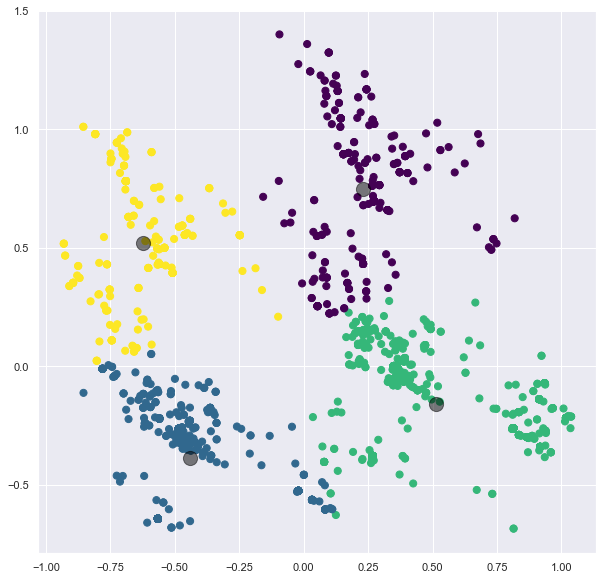

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.45021118562532214
For n_clusters = 3 The average silhouette_score is : 0.52060451932846
For n_clusters = 4 The average silhouette_score is : 0.5500529256925725
For n_clusters = 5 The average silhouette_score is : 0.5718523360177428
For n_clusters = 6 The average silhouette_score is : 0.619804319846239
For n_clusters = 7 The average silhouette_score is : 0.6375509290494075
For n_clusters = 8 The average silhouette_score is : 0.615801485808092


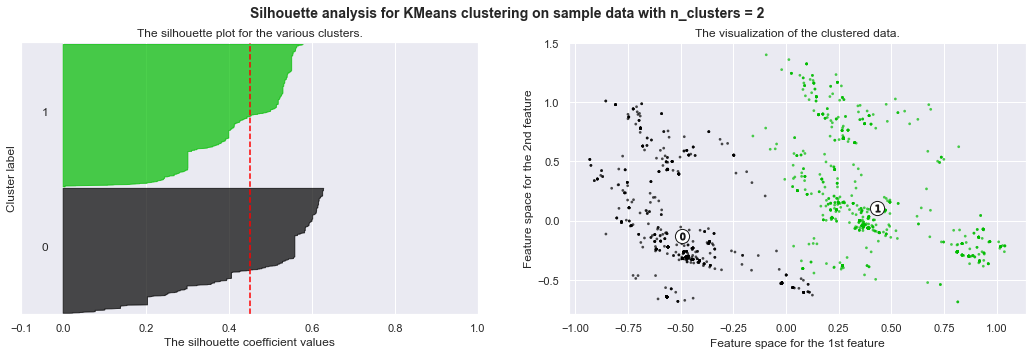

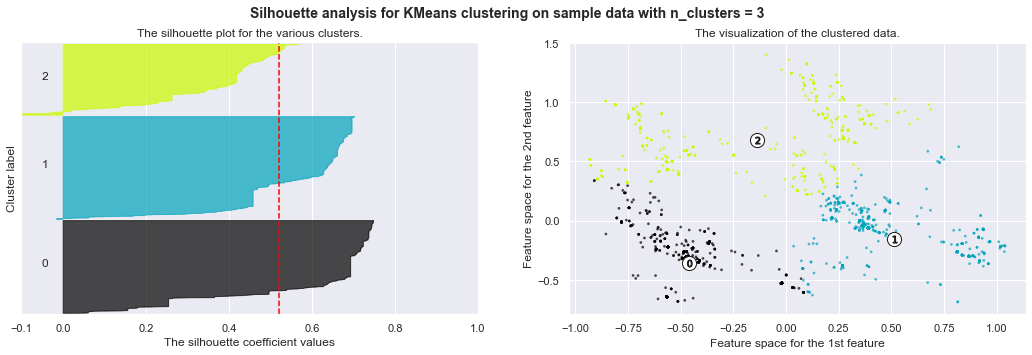

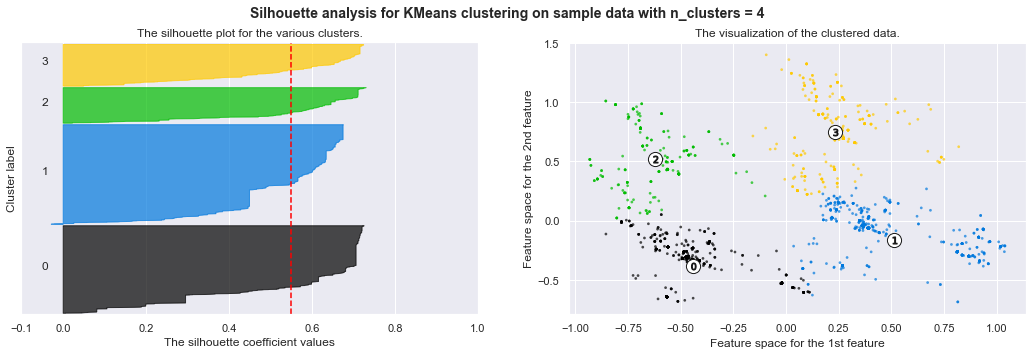

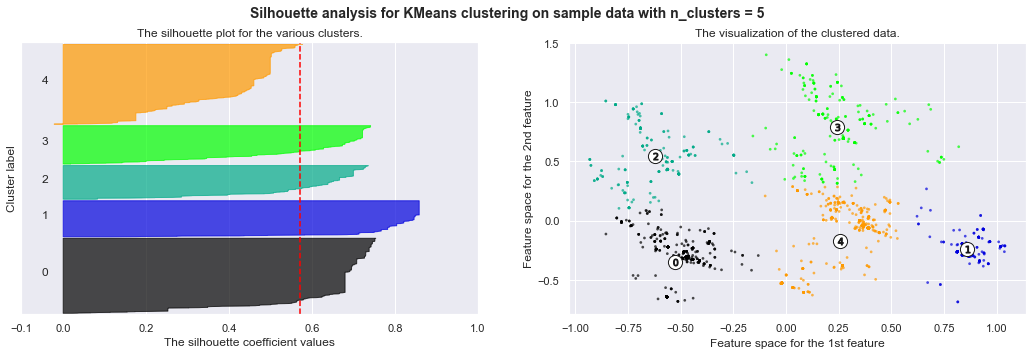

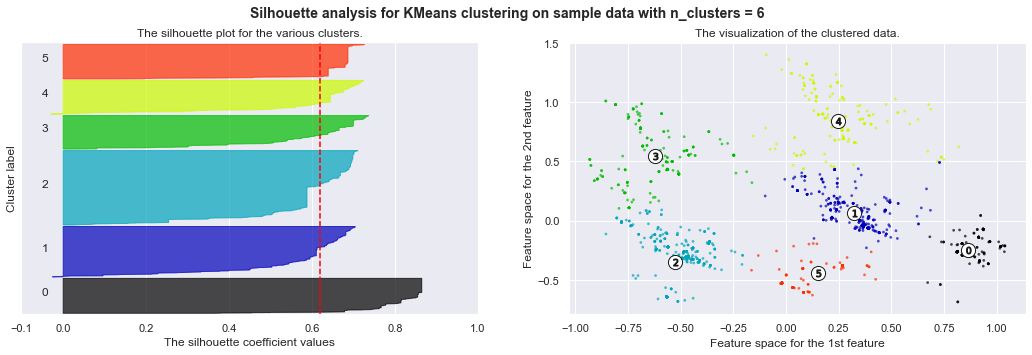

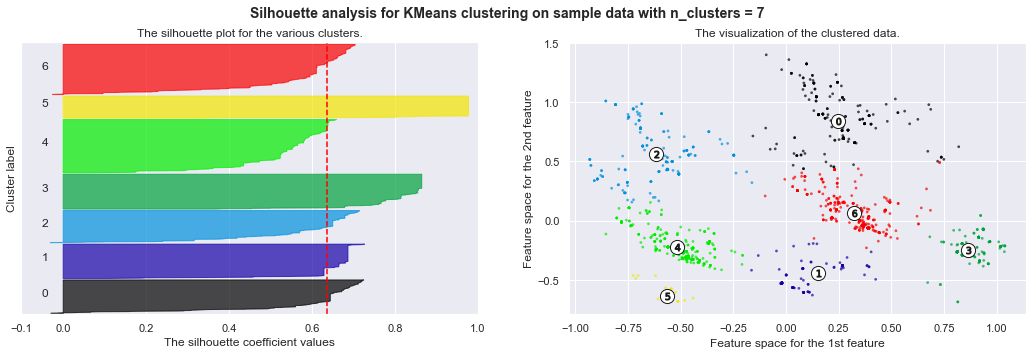

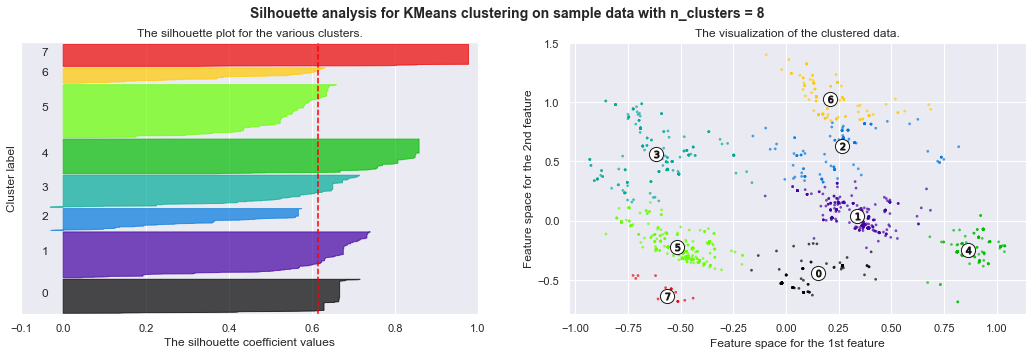

In [82]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

print(__doc__)


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
# range_n_clusters = list(set(np.linspace(2, 50).astype(int)))


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_pca[:, 0], X_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()